In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =10,8

In [6]:
dataset = pd.read_csv("INSULT_TOTAL.csv")
# dataset['Year'] = pd.to_datetime(dataset['Year'], infer_datetime_format= True)
indexedDataset = dataset.set_index(['Year'])

In [7]:
from datetime import datetime
indexedDataset

,Insult to modesty of Women
Year,
2001,9746
2002,10155
2003,12325
2004,10001
2005,9984
2006,9966
2007,10950
2008,12214
2009,11009


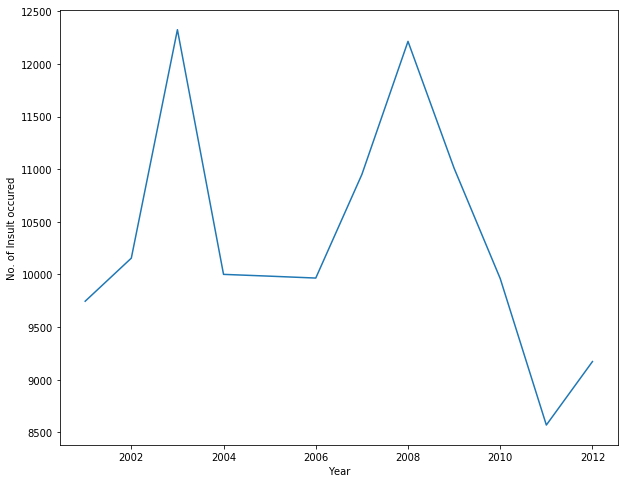

In [8]:
plt.xlabel("Year")
plt.ylabel("No. of Insult occured")
plt.plot(indexedDataset)

In [9]:
#as we can see the data is not stationary, theres an upward trend..it keeps on fluctuating
#there are 2 diff ways by which you can check the stationarity of the data. 1-by rolling mean and rolling std and 2-by dickey-fuller test 
rolmean = indexedDataset.rolling(window=2).mean() #for determining the rolling mean and standard deviation
rolstd = indexedDataset.rolling(window=2).std()
print(rolmean, rolstd)

      Insult to modesty of Women
Year                            
2001                         NaN
2002                      9950.5
2003                     11240.0
2004                     11163.0
2005                      9992.5
2006                      9975.0
2007                     10458.0
2008                     11582.0
2009                     11611.5
2010                     10485.0
2011                      9265.5
2012                      8871.5       Insult to modesty of Women
Year                            
2001                         NaN
2002                  289.206674
2003                 1534.421715
2004                 1643.316159
2005                   12.020815
2006                   12.727922
2007                  695.793073
2008                  893.782971
2009                  852.063671
2010                  741.047907
2011                  983.585533
2012                  426.385389


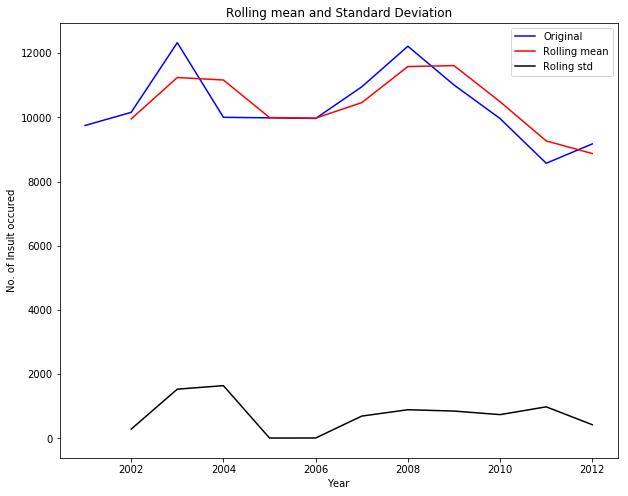

In [10]:
orig = plt.plot(indexedDataset, color ='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling mean')
std = plt.plot(rolstd, color='black', label='Roling std')
plt.legend(loc='best')
plt.xlabel("Year")
plt.ylabel("No. of Insult occured")
plt.title('Rolling mean and Standard Deviation')
plt.show(block=False)



In [11]:
#from the above graph you can see that the std and mean is not constant, it keeps on changing
#dickey fuller test
from statsmodels.tsa.stattools import adfuller
print ('Results of dickey-fuller test:')
dftest = adfuller(indexedDataset['Insult to modesty of Women'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test statstic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]= value
    
print(dfoutput)

Results of dickey-fuller test:
Test statstic                 -0.000000
p-value                        0.958532
#Lags Used                     7.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


Text(0,0.5,'No. of Insult occured')

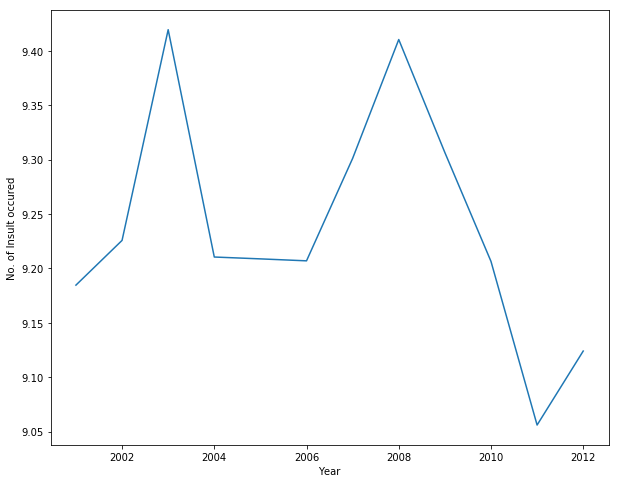

In [12]:
#as you can see the value of p is 0.9 ....but the null hypothesis should be as less as possible ...must be around 0.5
#hence we cannot reject the null hypothesis ...this shows that the data is not stationary 
indexedDataset_logScale = np.log(indexedDataset) #estimating the trend by taking log of the data that is stored in indexdataset
plt.plot(indexedDataset_logScale) #since log of the data is done the y axis values changes accordingly bt the trend remains the same
plt.xlabel("Year")
plt.ylabel("No. of Insult occured")

Text(0,0.5,'No. of Insult occured')

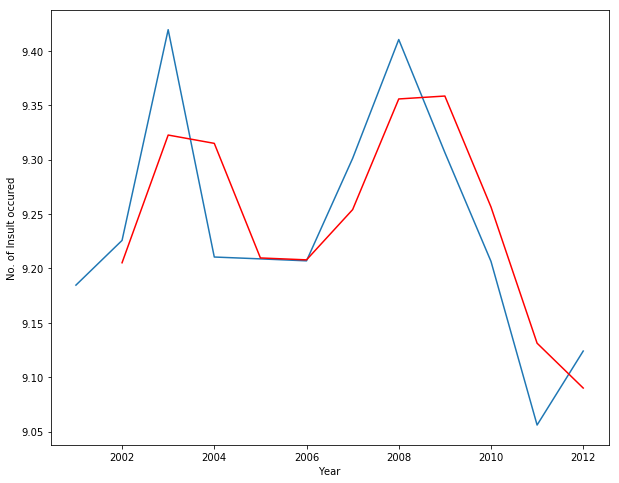

In [13]:
#calculating the mean and std of the log value
movingAverage = indexedDataset_logScale.rolling(window=2).mean()
movingSTD=indexedDataset_logScale.rolling(window=2).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red') 
plt.xlabel("Year")
plt.ylabel("No. of Insult occured")
#over here as well the data is not stationary the mean keeps changing according to the time

In [14]:
#finding the difference of the two types
#the data can be made stationary by diff ways such as taking log ,squaring, cube root etc
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage

,Insult to modesty of Women
Year,
2002,0.020555
2003,0.096832
2004,-0.104472
2005,-0.000851
2006,-0.000902
2007,0.047080
2008,0.054622
2009,-0.051935
2010,-0.050018


In [15]:
# the code for a  DCF 
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window=2).mean()
    movingSTD = timeseries.rolling(window=2).std()
    
    orig = plt.plot(timeseries, color ='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling mean')
    std = plt.plot(movingSTD, color='black', label='Roling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and Standard Deviation')
    plt.xlabel("Year")
    plt.ylabel("No. of Insult occured")
    plt.show(block=False)
 
    
    print ('Results of dickey-fuller test:')
    dftest = adfuller(timeseries['Insult to modesty of Women'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statstic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value
    print(dfoutput)

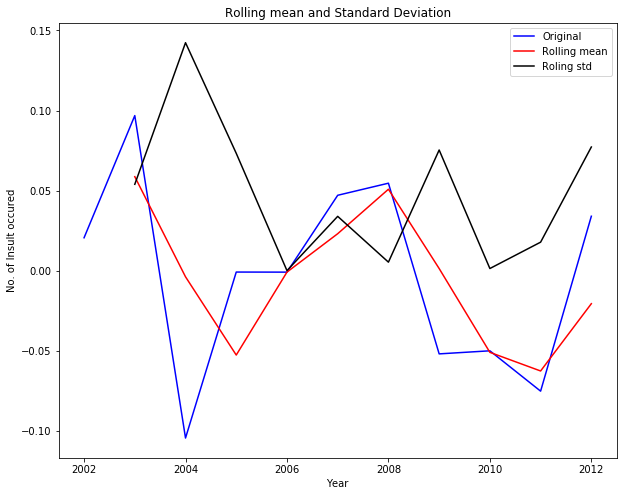

Results of dickey-fuller test:
Test statstic                 -2.641867
p-value                        0.084649
#Lags Used                     2.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


In [16]:
test_stationarity(datasetLogScaleMinusMovingAverage)

Text(0,0.5,'No. of Insult occured')

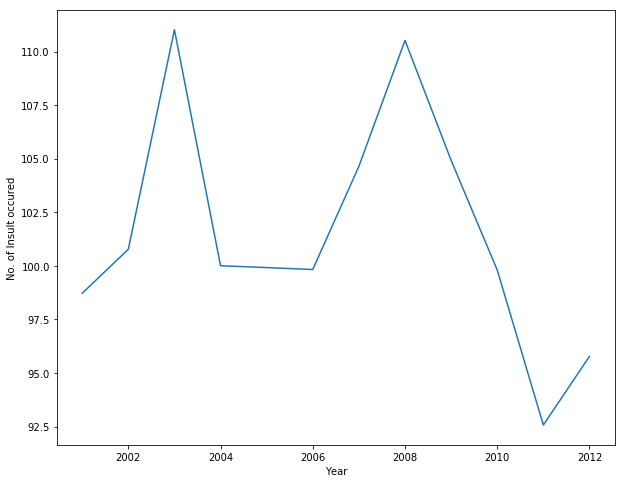

In [17]:
indexedDataset_sqScale = np.sqrt(indexedDataset) #estimating the trend by taking log of the data that is stored in indexdataset
plt.plot(indexedDataset_sqScale)
plt.xlabel("Year")
plt.ylabel("No. of Insult occured")

Text(0,0.5,'No. of Insult occured')

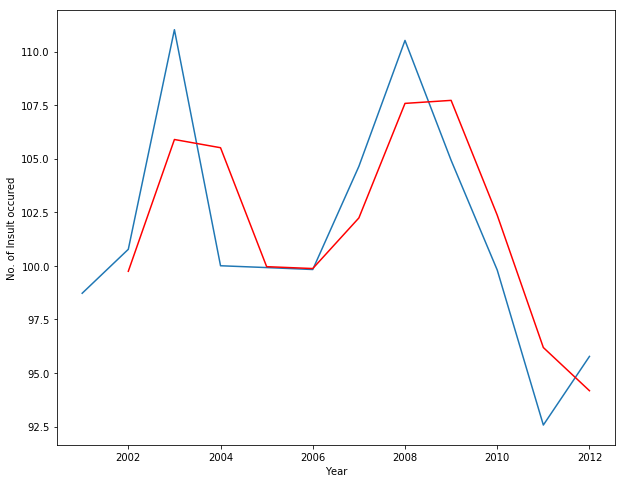

In [18]:
movingAveragesq = indexedDataset_sqScale.rolling(window=2).mean()
movingSTDsq = indexedDataset_sqScale.rolling(window=2).std()
plt.plot(indexedDataset_sqScale)
plt.plot(movingAveragesq,color='red') 
plt.xlabel("Year")
plt.ylabel("No. of Insult occured")

In [19]:
datasetsqScaleMinusMovingAverage = indexedDataset_sqScale - movingAveragesq
datasetsqScaleMinusMovingAverage

datasetsqScaleMinusMovingAverage.dropna(inplace=True)
datasetsqScaleMinusMovingAverage

,Insult to modesty of Women
Year,
2002,1.025094
2003,5.122998
2004,-5.506508
2005,-0.042516
2006,-0.045056
2007,2.406196
2008,2.937360
2009,-2.796593
2010,-2.559486


Text(0,0.5,'No. of Insult occured')

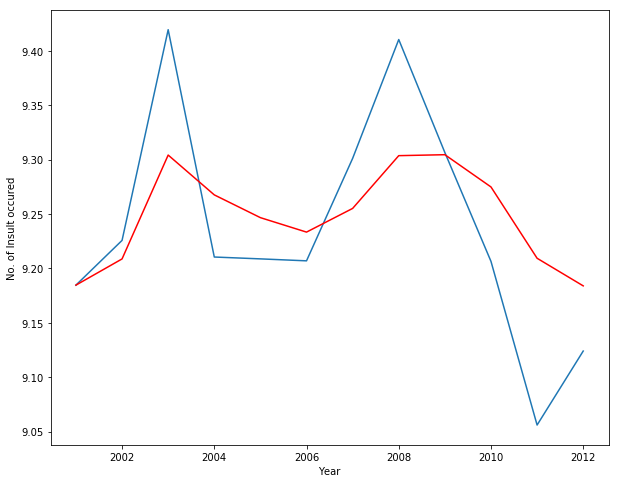

In [20]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife= 2,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')
plt.xlabel("Year")
plt.ylabel("No. of Insult occured")

In [21]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAveragesq = timeseries.rolling(window=2).mean()
    movingSTDsq = timeseries.rolling(window=2).std()
    
    orig = plt.plot(timeseries, color ='blue', label='Original')
    mean = plt.plot(movingAveragesq, color='red', label='Rolling mean')
    std = plt.plot(movingSTDsq, color='black', label='Roling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and Standard Deviation')
    plt.show(block=False)
    
    print ('Results of dickey-fuller test:')
    dftest = adfuller(timeseries['Insult to modesty of Women'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statstic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value
    print(dfoutput)

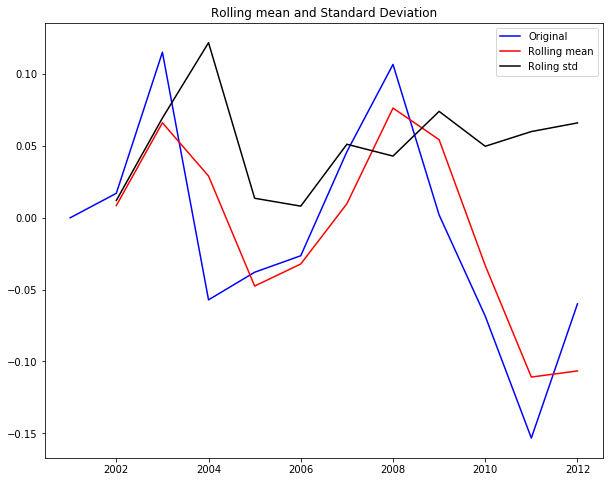

Results of dickey-fuller test:
Test statstic                 -0.000000
p-value                        0.958532
#Lags Used                     7.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


In [22]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

Text(0,0.5,'No. of Insult occured')

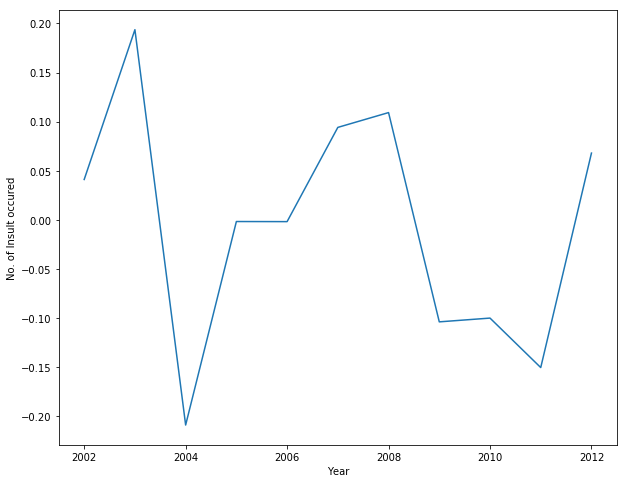

In [23]:
datasetLogDiffShifting = indexedDataset_logScale- indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)
plt.xlabel("Year")
plt.ylabel("No. of Insult occured")

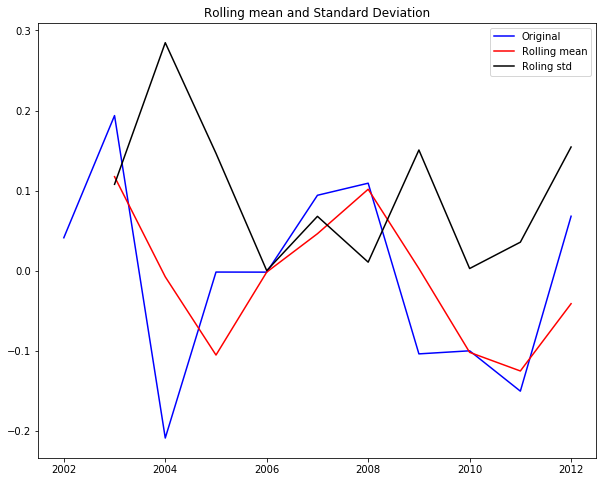

Results of dickey-fuller test:
Test statstic                 -3.012787
p-value                        0.033717
#Lags Used                     3.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


In [24]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

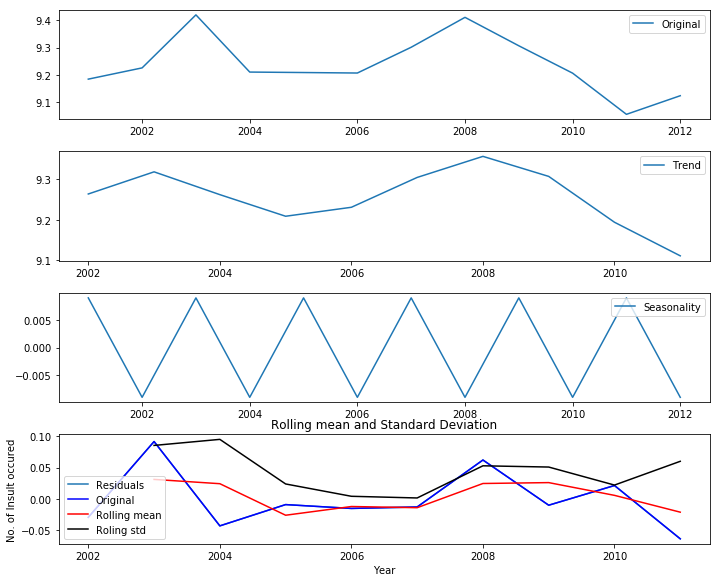

Results of dickey-fuller test:
Test statstic                 -0.000000
p-value                        0.958532
#Lags Used                     4.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition =seasonal_decompose(indexedDataset_logScale, freq=2)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale , label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc ='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("No. of Insult occured")
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


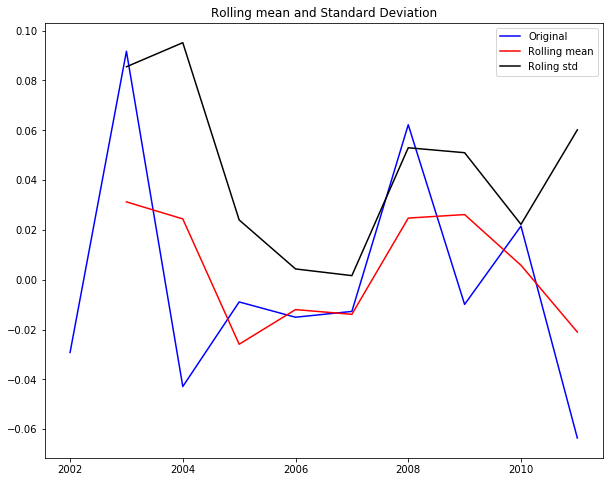

Results of dickey-fuller test:
Test statstic                 -0.000000
p-value                        0.958532
#Lags Used                     4.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


In [26]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


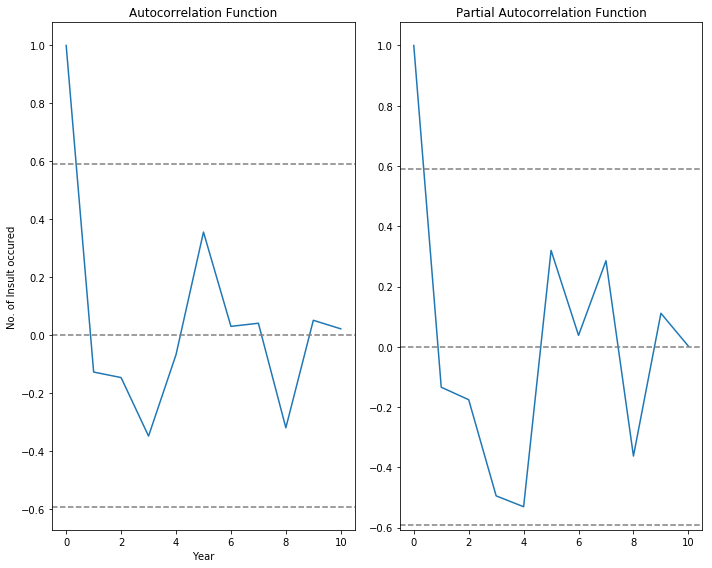

In [27]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=10)
lag_pacf = pacf(datasetLogDiffShifting, nlags =10, method='ols')

#plotting acf:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.xlabel("Year")
plt.ylabel("No. of Insult occured")
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


Plotting AR model


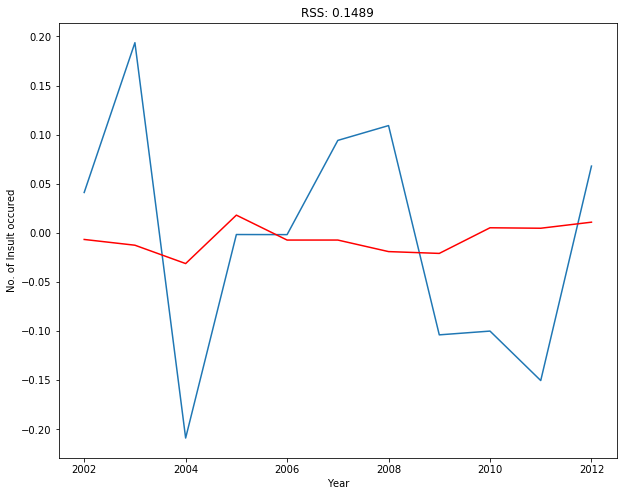

In [159]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
model = ARIMA(indexedDataset_logScale, order=(1,1,0)) #here the order includes value from the acf and pacf  ie p and q are the first downfall of the graph ie 1 and the midde value is the difference 
#the RSS value must be as low as possible
results_AR= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.xlabel("Year")
plt.ylabel("No. of Insult occured")
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Insult to modesty of Women"])**2))
print('Plotting AR model')

Plotting AR model


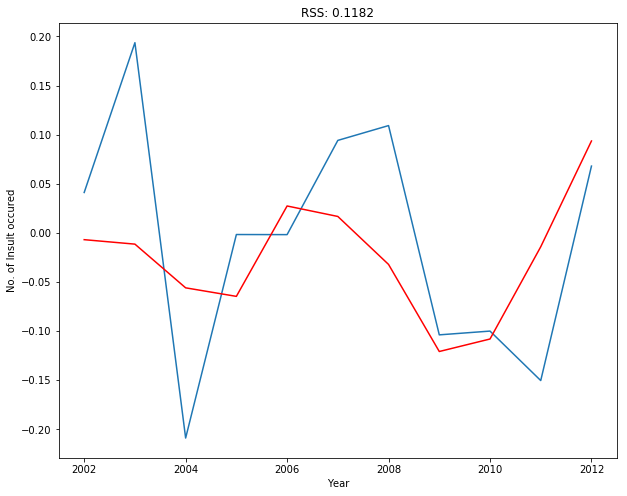

In [160]:
#MA Model
import warnings
warnings.filterwarnings('ignore')
model = ARIMA(indexedDataset_logScale, order= (2,1,1))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color ='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - datasetLogDiffShifting["Insult to modesty of Women"])**2))
plt.xlabel("Year")
plt.ylabel("No. of Insult occured")
print('Plotting AR model')


Text(0,0.5,'No. of Insult occured')

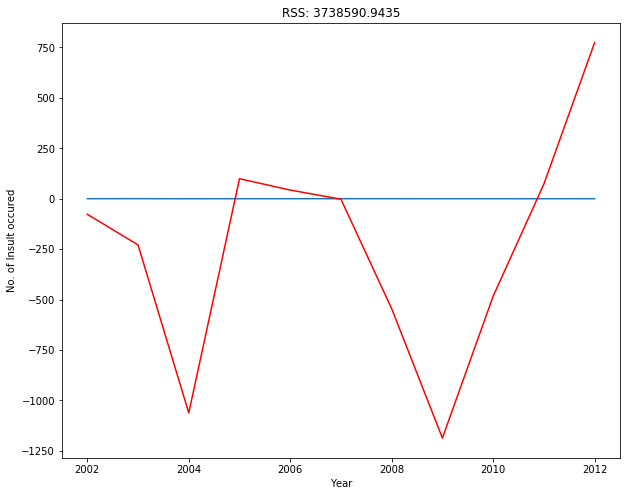

In [172]:
model = ARIMA(indexedDataset, order = (1,1,1))
import warnings
warnings.filterwarnings('ignore')
results_ARIMA =  model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['Insult to modesty of Women'])**2))
plt.xlabel("Year")
plt.ylabel("No. of Insult occured")



In [144]:
predictions_ARIMA_diff= pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Year
2002     -77.120029
2003    -228.964082
2004   -1061.795423
2005      99.207421
2006      42.910563
dtype: float64


In [145]:
#converting it to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Year
2002     -77.120029
2003    -306.084111
2004   -1367.879534
2005   -1268.672113
2006   -1225.761550
2007   -1228.242460
2008   -1773.343146
2009   -2959.655588
2010   -3443.192558
2011   -3370.594979
2012   -2597.145290
dtype: float64


In [146]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Insult to modesty of Women'].iloc[0], index= indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Year
2001       9.184612
2002     -67.935416
2003    -296.899499
2004   -1358.694922
2005   -1259.487501
dtype: float64

Text(0,0.5,'No. of Insult occured')

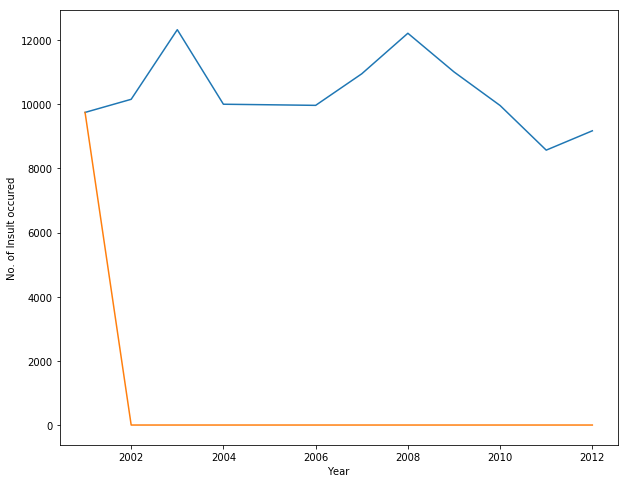

In [147]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
plt.xlabel("Year")
plt.ylabel("No. of Insult occured")

#orange line is the model that we have fitted 

In [148]:
 #before predicitng check the no. of rows
indexedDataset_logScale

,Insult to modesty of Women
Year,
2001,9.184612
2002,9.225721
2003,9.419385
2004,9.210440
2005,9.208739
2006,9.206935
2007,9.301095
2008,9.410338
2009,9.306468


Text(0,0.5,'No. of Importation occured')

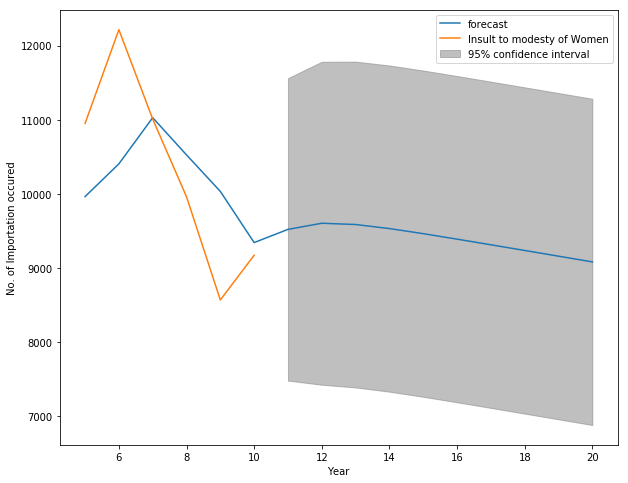

In [149]:
results_ARIMA.plot_predict(6,21)
import warnings
warnings.filterwarnings('ignore')
plt.xlabel("Year")
plt.ylabel("No. of Importation occured")

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ds = pd.read_csv("2013.csv")
ds

,Crimes,Rate
0,Rape,33707
1,Kidnapping and Abduction,51881
2,Dowry Deaths,8083
3,Assault on women with intent to outrage her mo...,70739
4,Insult to modesty of Women,12589
5,Cruelty by Husband or his Relatives,118866
6,Importation of Girls,31


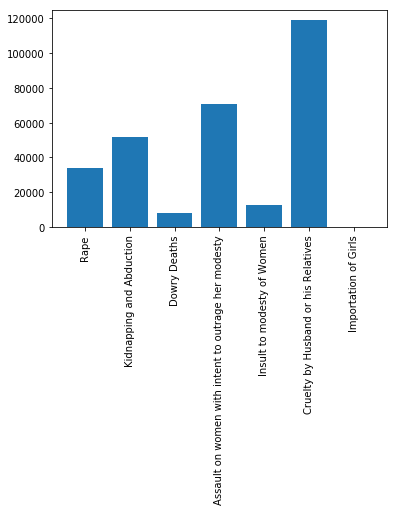

In [4]:
# Make a fake dataset:
height = ds.Rate
bars = ds.Crimes
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars , rotation=90)
#text(seq(1, 10, by=1), par("usr")[3] - 0.2, labels = lablist, srt = 45, pos = 1, xpd = TRUE)
 
# Show graphic
plt.show()